In [215]:
import pandas as pd

df = pd.read_csv("/kaggle/input/patient/dataset.csv")

In [216]:
df = df.drop(["Unnamed: 83"], axis = 1)

In [217]:
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [218]:
y = df["hospital_death"]

In [219]:
df = pd.get_dummies(df)

In [220]:
df["hospital_death"]

0        0
1        0
2        0
3        0
4        0
        ..
91708    0
91709    0
91710    0
91711    0
91712    0
Name: hospital_death, Length: 91713, dtype: int64

In [221]:
df = df.dropna()

In [222]:
len(y)

91713

In [223]:
df["hospital_death"]

0        0
1        0
5        0
9        0
10       0
        ..
91698    0
91706    0
91708    0
91709    0
91712    0
Name: hospital_death, Length: 57598, dtype: int64

In [224]:
from sklearn.model_selection import train_test_split

df = df.drop(["encounter_id", "patient_id", "hospital_id"], axis = 1)

y = df["hospital_death"]
X = df.drop(["hospital_death"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 42)


In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
df = df.drop(["icu_id"], axis = 1)

In [227]:
quantitative_columns = df.select_dtypes(include=['float']).columns

# Perform standard scaling on quantitative columns
scaler = StandardScaler()
df[quantitative_columns] = scaler.fit_transform(df[quantitative_columns])

boolean_columns = df.select_dtypes(include='bool').columns
df[boolean_columns] = df[boolean_columns].astype(int)

print("DataFrame after standard scaling:")
df

DataFrame after standard scaling:


,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,...,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0.325832,-0.787781,0,0.975000,-0.116010,-0.419676,-0.805514,-0.099087,0,-0.174127,...,1,0,0,0,0,0,0,0,0,0
1,0.866677,-0.223967,0,-0.910654,0.043901,-0.567031,-0.863896,-0.762853,0,-0.174127,...,0,0,0,0,0,0,1,0,0,0
5,0.265739,-0.207136,0,1.922471,-0.340059,0.619778,1.389653,-0.318863,0,-0.174127,...,0,0,0,0,1,0,0,0,0,0
9,-0.755856,-0.429537,0,0.510553,-0.315325,-0.216564,-0.817190,-0.975969,0,-0.174127,...,1,0,0,0,0,0,0,0,0,0
10,0.566208,-0.123339,1,-1.384390,-0.338333,-0.662613,1.413006,1.681470,1,-0.174127,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91698,-0.936138,2.663609,1,2.340473,-0.326541,4.044798,1.424682,1.907750,1,-0.174127,...,0,1,0,0,0,0,0,0,0,0
91706,-0.515481,-1.143567,0,0.742776,-0.329705,-0.873690,-0.852220,-0.973749,0,-0.174127,...,1,0,0,0,0,0,0,0,0,0
91708,0.746489,-0.748080,0,0.742776,-0.216674,-0.459501,-0.805514,-0.101196,0,-0.174127,...,1,0,0,0,0,0,0,0,0,0
91709,-0.395293,2.151467,0,1.225801,-0.290590,2.929675,-0.805514,-0.101219,0,-0.174127,...,1,0,0,0,0,0,0,0,0,0


In [228]:
from sklearn.linear_model import LogisticRegression

In [229]:
logreg = LogisticRegression()

In [189]:
logreg.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [190]:
preds = logreg.predict_proba(X_test)[:, 1]

In [192]:
auroc = roc_auc_score(y_test["hospital_death"].tolist(), preds)

In [199]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

rf_classifier.fit(X_train, y_train)



RandomForestClassifier(n_estimators=300, random_state=42)

In [200]:
rf_preds = rf_classifier.predict_proba(X_test)
rf_preds = rf_preds[:, 1]

In [201]:
rf_auroc = roc_auc_score(y_test["hospital_death"].tolist(), rf_preds)

In [238]:
from sklearn.neural_network import MLPClassifier

# Instantiate the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Train the MLP classifier on the training data
mlp_classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100), max_iter=1000, random_state=42)

In [239]:
mlp_preds = mlp_classifier.predict_proba(X_test)[:, 1]

In [240]:
mlp_auroc = roc_auc_score(y_test, mlp_preds)

In [241]:
mlp_auroc

0.8220994699651696

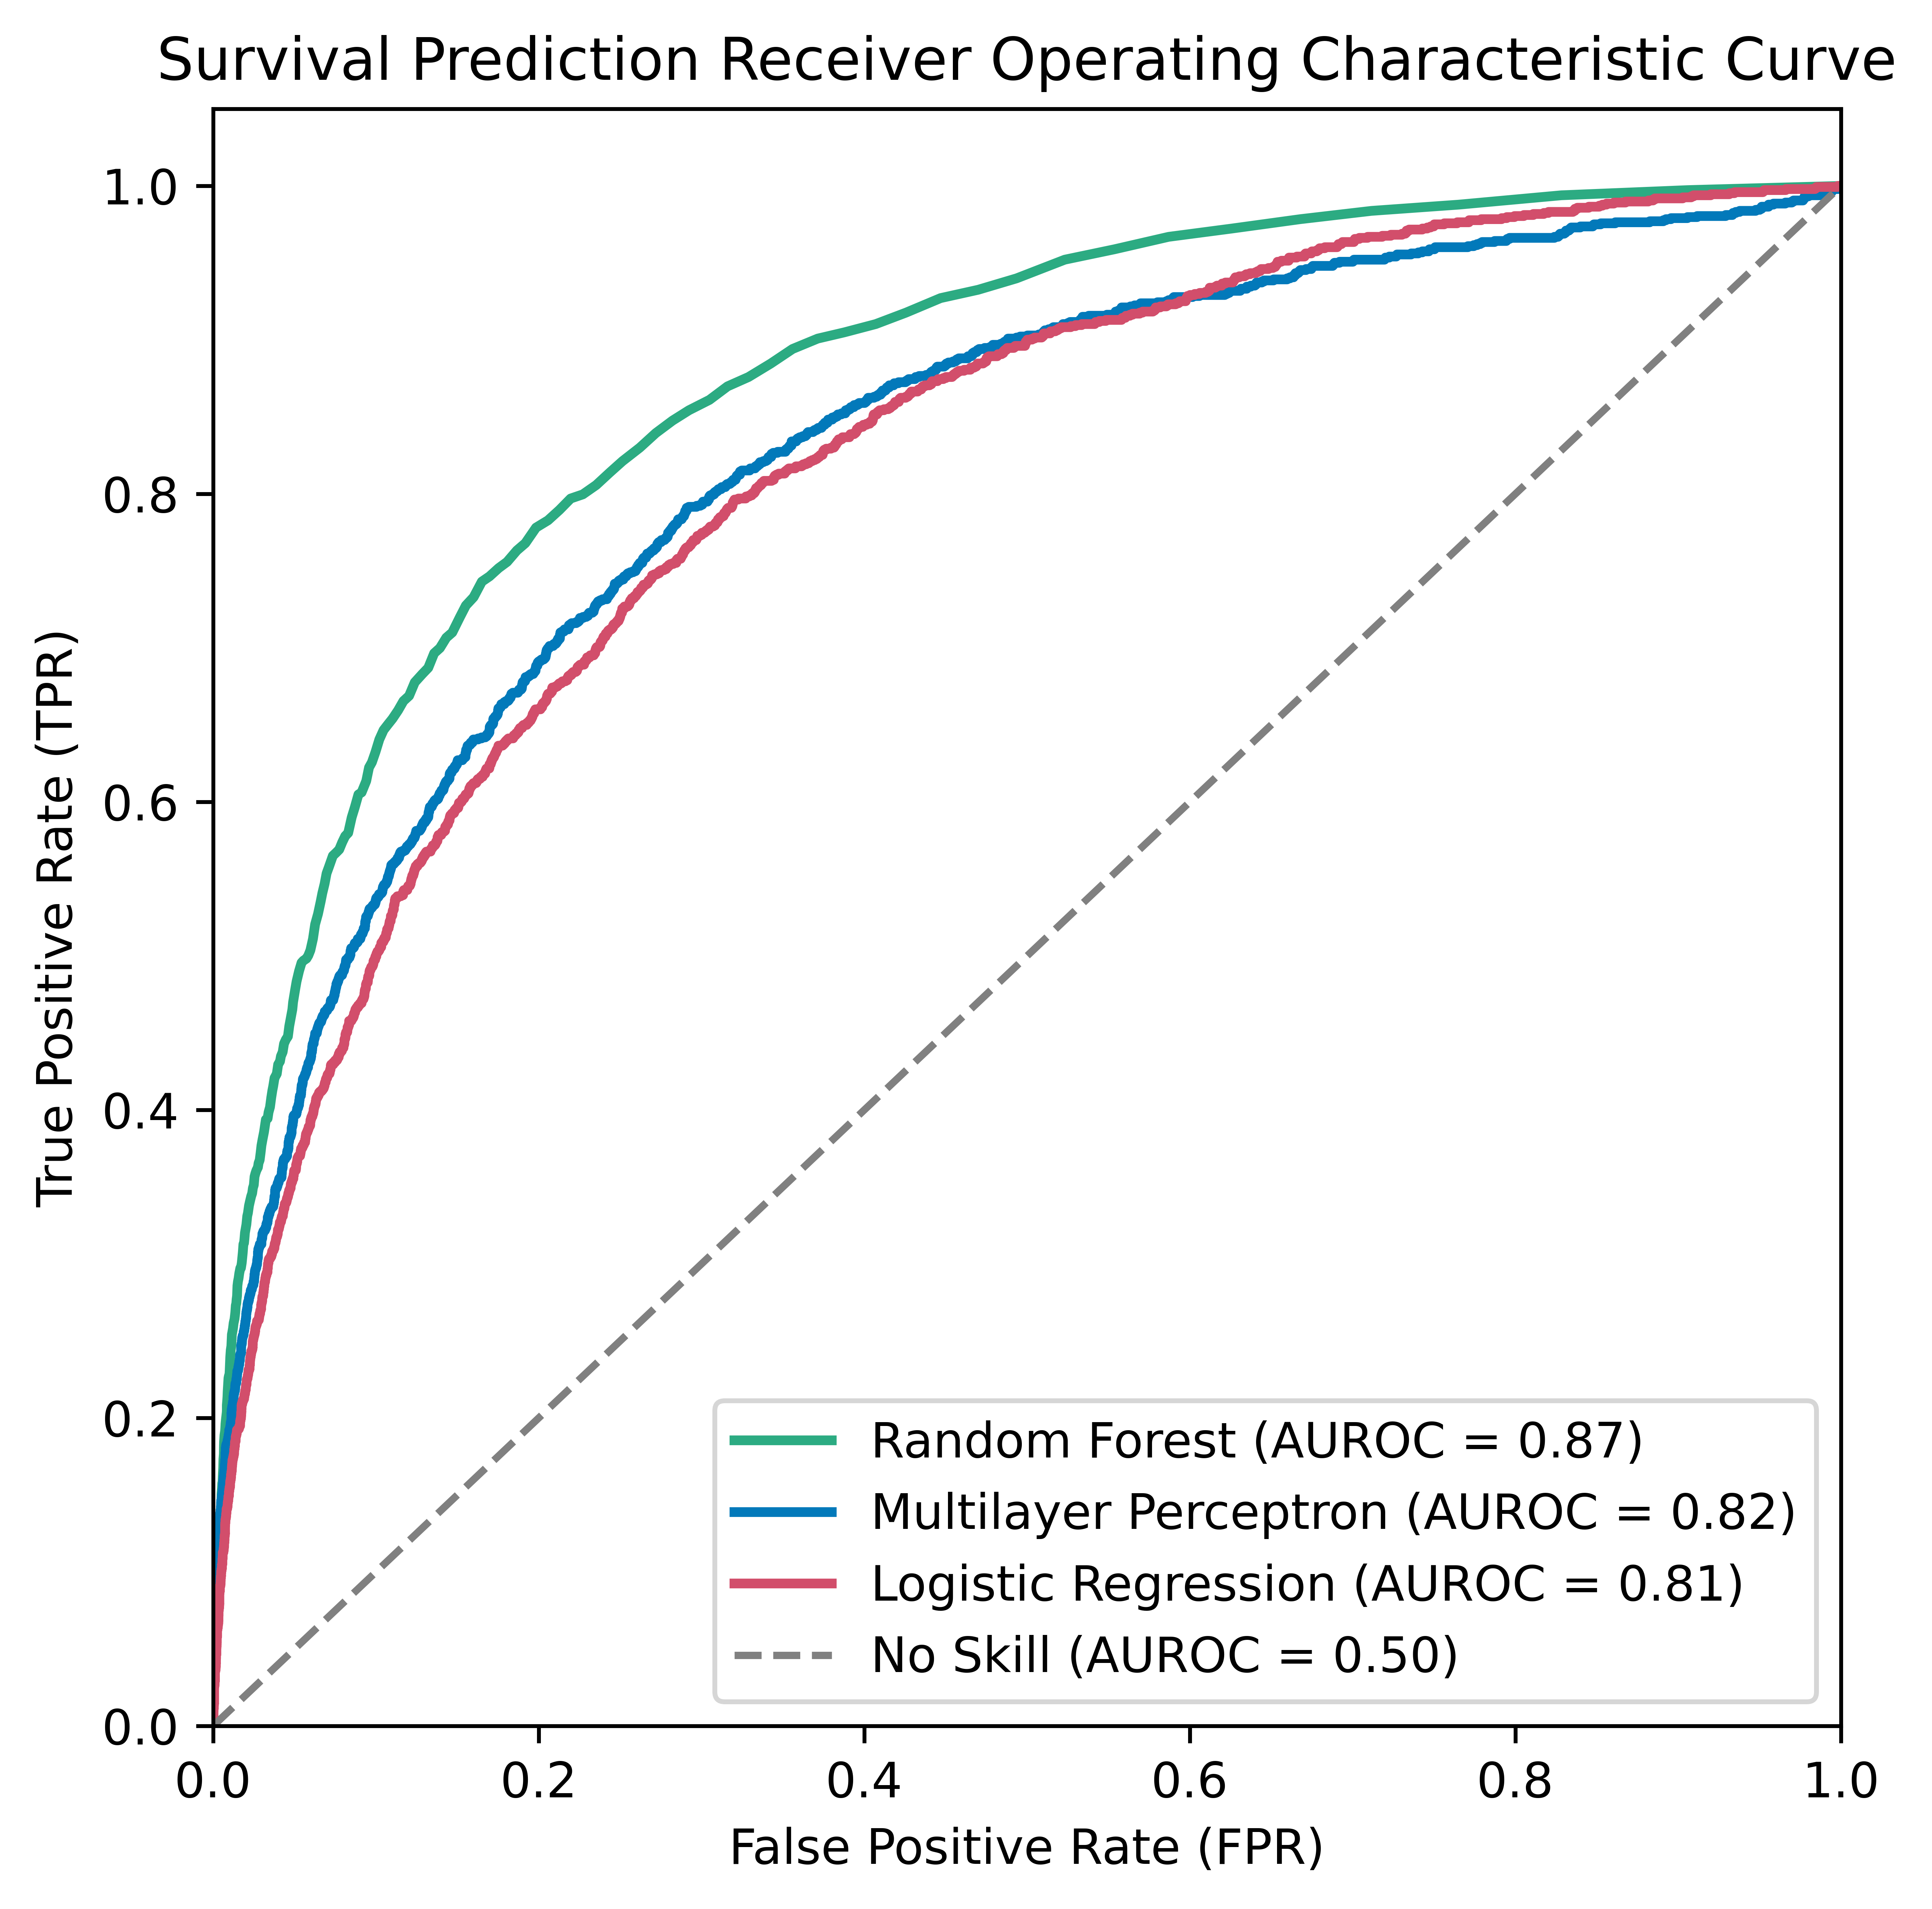

In [247]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, preds)
rffpr, rftpr, rfthresholds = roc_curve(y_test, rf_preds)
mlpfpr, mlptpr, mlpthresholds = roc_curve(y_test, mlp_preds)

plt.figure(figsize=(6, 6))
plt.plot(rffpr, rftpr, color='#2cab82', lw=2, label='Random Forest (AUROC = %0.2f)' % rf_auroc)
plt.plot(mlpfpr, mlptpr, color = "#0279ba", lw = 2, label = "Multilayer Perceptron (AUROC = %0.2f)" % mlp_auroc)
plt.plot(fpr, tpr, color='#d24e6b', lw=2, label='Logistic Regression (AUROC = %0.2f)' % auroc)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label = "No Skill (AUROC = 0.50)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Survival Prediction Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.gcf().set_dpi(1000)
plt.savefig("roc.png", dpi = 2000)

In [248]:
! pip install shap

In [250]:
import shap
# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf_classifier)

In [ ]:
# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)